In [ ]:
! pip3 install -r ./data/requirements.txt

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from tqdm import tqdm
import data.mnist_downloader  as md
from mnist import MNIST
import sys

# 1. Preparations

## 1.1 Importing required code

In [20]:
sys.path.append("../../Framework/")
from neuralNetwork import NeuralNetwork

## 1.2 Download and load the dataset

In the "data" folder of this repository you can find the file `mnist_downloader.py`, which automates the process of downloading und unpacking the MNIST dataset:

In [21]:
# make sure that you don't accidentally add the download folder
# to your git (it *should* already be in the .gitignore, so you should be fine)
download_folder = "./data/mnist/"
md.download_and_unzip(download_folder)

data\mnist\train-images-idx3-ubyte.gz already exists, skipping ...
data\mnist\train-images-idx3-ubyte already exists, skipping ... 
data\mnist\train-labels-idx1-ubyte.gz already exists, skipping ...
data\mnist\train-labels-idx1-ubyte already exists, skipping ... 
data\mnist\t10k-images-idx3-ubyte.gz already exists, skipping ...
data\mnist\t10k-images-idx3-ubyte already exists, skipping ... 
data\mnist\t10k-labels-idx1-ubyte.gz already exists, skipping ...
data\mnist\t10k-labels-idx1-ubyte already exists, skipping ... 


We can now load the dataset in our notebook.

The dataset consists of 60.000 images for training and 10.000 images for validation which are stored together in large binary files. That is why we cannot use Pandas to load all data, we need code that understands the binary format. Luckily, someone built a library (appropriately named "mnist") that just does that. This library should have been installed during the previous step. 

In this cell we use this library to load two datasets: one for the training, and one for validating our model so we can get an idea for how our models performs on unseen data.

In [22]:
mndata = MNIST('./data/mnist', return_type="numpy")

images_train, labels_train = mndata.load_training()
images_validation, labels_validation = mndata.load_testing()

Let's have a look at how many samples we have in each dataset:

In [23]:
print("Number of samples for training:", images_train.shape[0])
print("Number of samples for validation:", images_validation.shape[0])

Number of samples for training: 60000
Number of samples for validation: 10000


# 2. Preprocessing

For a better traininng, we shuffle the loaded datasets:

In [24]:
perm = np.random.permutation(images_train.shape[0])
images_train = images_train[perm].astype(float)
labels_train = labels_train[perm]

perm = np.random.permutation(images_validation.shape[0])
images_validation = images_validation[perm].astype(float)
labels_validation = labels_validation[perm]

Then we normalized the values.

They are integers representing a color by the interval 0 to 255:

In [25]:
images_train = images_train / 255

In [26]:
num_unique = len(np.unique(labels_train))
labels_train = np.eye(num_unique)[labels_train]

num_unique = len(np.unique(labels_validation))
labels_validation = np.eye(num_unique)[labels_validation]

In [27]:
print(images_train.shape)
print(labels_train.shape)

print(images_validation.shape)
print(labels_validation.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


# 3. Training

In [28]:
NN = NeuralNetwork(images_train, labels_train, 256, 0.1, 1000, 256, 128)
NN.train()

Training:  0 % .    Accuracy:  35.15625 %
Training:  1 % .    Accuracy:  67.1875 %
Training:  2 % .    Accuracy:  75.0 %
Training:  3 % .    Accuracy:  80.078125 %
Training:  4 % .    Accuracy:  80.859375 %
Training:  5 % .    Accuracy:  83.203125 %
Training:  6 % .    Accuracy:  83.984375 %
Training:  7 % .    Accuracy:  84.375 %
Training:  8 % .    Accuracy:  86.328125 %
Training:  9 % .    Accuracy:  87.5 %
Training:  10 % .    Accuracy:  87.5 %
Training:  11 % .    Accuracy:  88.28125 %
Training:  12 % .    Accuracy:  89.0625 %
Training:  13 % .    Accuracy:  89.0625 %
Training:  14 % .    Accuracy:  89.0625 %
Training:  15 % .    Accuracy:  89.453125 %
Training:  16 % .    Accuracy:  89.0625 %
Training:  17 % .    Accuracy:  88.671875 %
Training:  18 % .    Accuracy:  88.671875 %
Training:  19 % .    Accuracy:  89.453125 %
Training:  20 % .    Accuracy:  90.234375 %
Training:  21 % .    Accuracy:  90.234375 %
Training:  22 % .    Accuracy:  90.234375 %
Training:  23 % .    Accurac

We save the model to be able to use validation or prediction in the future.

In [29]:
NN.save("./data/model/NN.pkl")

# 4. Validation

First we will check the accuracy during training:

Accuracy: 98.22999999999999 %
Number of samples:  60000


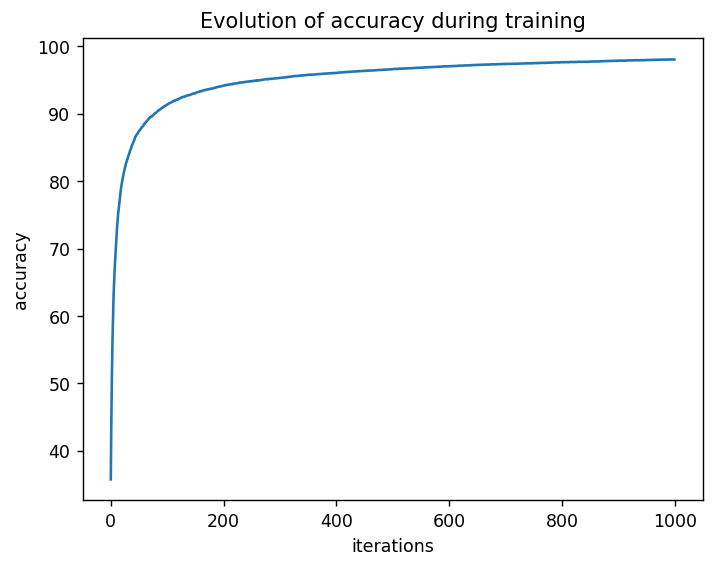

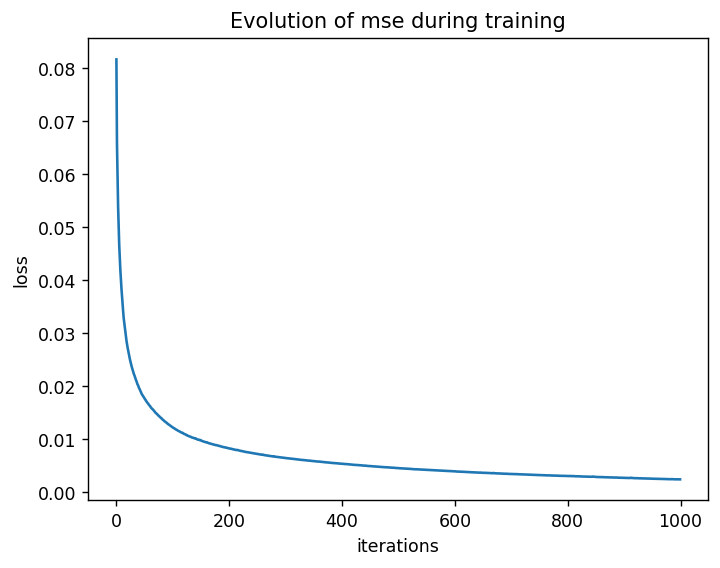

In [30]:
NN.validation(images_train,labels_train)
print("Number of samples: ", images_train.shape[0])
NN.plot_accuracy()
NN.plot_learning()

Let's check what are the missclassificated samples:

In [31]:
idx = 0
fails = 0
list_booleans = []
for idx in range(len(images_train)):
    x = images_train[idx].reshape(1, -1)
    prediction = NN.predict(x)
    if(prediction != np.argmax(labels_train[idx])):
        print(str("%6s" % idx) + ")", "Prediction: ", prediction, "    |    Real: ", np.argmax(labels_train[idx]))
        fails += 1
    list_booleans.append(prediction == np.argmax(labels_train[idx]))
print("\nNumber of fails:", str(fails) + "/" + str(len(images_train)), ":", fails/len(images_train) * 100,"%")

     3) Prediction:  1     |    Real:  3
    12) Prediction:  3     |    Real:  8
    17) Prediction:  6     |    Real:  0
   118) Prediction:  3     |    Real:  8
   134) Prediction:  2     |    Real:  1
   159) Prediction:  4     |    Real:  9
   279) Prediction:  2     |    Real:  7
   306) Prediction:  2     |    Real:  7
   307) Prediction:  5     |    Real:  8
   378) Prediction:  3     |    Real:  8
   383) Prediction:  2     |    Real:  4
   575) Prediction:  3     |    Real:  1
   583) Prediction:  8     |    Real:  9
   593) Prediction:  3     |    Real:  7
   615) Prediction:  4     |    Real:  9
   628) Prediction:  4     |    Real:  7
   638) Prediction:  9     |    Real:  4
   670) Prediction:  2     |    Real:  1
   727) Prediction:  2     |    Real:  7
   754) Prediction:  8     |    Real:  9
   758) Prediction:  8     |    Real:  0
   807) Prediction:  3     |    Real:  7
   978) Prediction:  4     |    Real:  9
  1028) Prediction:  8     |    Real:  5
  1079) Predicti

Now we can validate our model by checking the accuracy of data never seen before:

In [32]:
NN.validation(images_validation,labels_validation)
print("Number of samples: ", images_validation.shape[0])

Accuracy: 90.47 %
Number of samples:  10000


Again we can check what are the missclassificated samples:

In [33]:
idx = 0
fails = 0
list_predictions = []
for idx in range(len(images_validation)):
    prediction = NN.predict(images_validation[idx])
    if(prediction != np.argmax(labels_validation[idx])):
        print(str("%6s" % idx) + ")", "Prediction: ", prediction, "    |    Real: ", np.argmax(labels_validation[idx]))
        fails += 1
    list_predictions.append(prediction.astype(int))
print("\nNumber of fails:", str(fails) + "/" + str(len(images_validation)), ":", fails/len(images_validation) * 100,"%")

    25) Prediction:  6     |    Real:  9
    29) Prediction:  0     |    Real:  5
    30) Prediction:  3     |    Real:  1
    39) Prediction:  1     |    Real:  3
    45) Prediction:  5     |    Real:  8
    58) Prediction:  3     |    Real:  8
    60) Prediction:  3     |    Real:  8
    61) Prediction:  3     |    Real:  8
    62) Prediction:  5     |    Real:  6
    67) Prediction:  5     |    Real:  8
   113) Prediction:  4     |    Real:  9
   116) Prediction:  5     |    Real:  6
   120) Prediction:  7     |    Real:  2
   127) Prediction:  1     |    Real:  8
   133) Prediction:  5     |    Real:  8
   135) Prediction:  2     |    Real:  3
   145) Prediction:  1     |    Real:  8
   148) Prediction:  9     |    Real:  4
   151) Prediction:  7     |    Real:  9
   159) Prediction:  4     |    Real:  9
   174) Prediction:  9     |    Real:  4
   197) Prediction:  0     |    Real:  5
   202) Prediction:  3     |    Real:  8
   221) Prediction:  8     |    Real:  1
   228) Predicti

# 5. Confusion matrix

A good way to visually understand how did well did the model performed on the validation data is by creating a confusion matrix.

This matrix represents the way samples have been clasified. If the main diagonal is shown then the model acts as expected:

Move type 0:

	· 948 type 0 movements have been classified as 0.

	· 0 type 0 movements have been classified as 1.

	· 14 type 0 movements have been classified as 2.

	· 1 type 0 movements have been classified as 3.

	· 2 type 0 movements have been classified as 4.

	· 10 type 0 movements have been classified as 5.

	· 3 type 0 movements have been classified as 6.

	· 2 type 0 movements have been classified as 7.

	· 6 type 0 movements have been classified as 8.

	· 6 type 0 movements have been classified as 9.

Move type 1:

	· 0 type 1 movements have been classified as 0.

	· 1121 type 1 movements have been classified as 1.

	· 19 type 1 movements have been classified as 2.

	· 11 type 1 movements have been classified as 3.

	· 18 type 1 movements have been classified as 4.

	· 0 type 1 movements have been classified as 5.

	· 3 type 1 movements have been classified as 6.

	· 16 type 1 movements have been classified as 7.

	· 20 type 1 movements have been classified as 8.

	· 24 type

<AxesSubplot: >

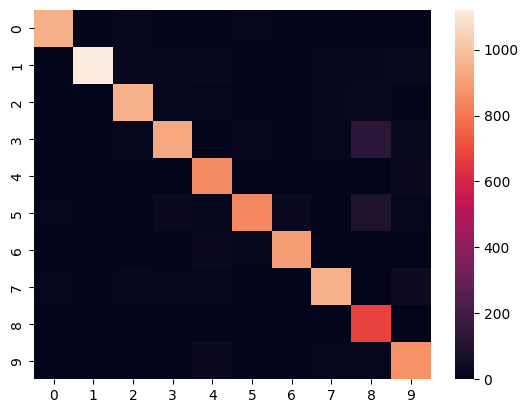

In [34]:
confusion_m = NN.getConfusionMatrix(list_predictions, labels_validation)

sns.heatmap(confusion_m)

for i in range(len(confusion_m)):
    print("Move type " + str(i) + ":\n")
    for j in range(10):
        print("\t· " + str((confusion_m[i,j]).astype(int)) +  " type " + str(i) + " movements have been classified as " + str(j) +".\n")